In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
# Read the data
movies = pd.read_csv('../data/movies.csv')
ratings = pd.read_csv('../data/ratings.csv')

## EDA

In [96]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [97]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [98]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  58098 non-null  int64 
 1   title    58098 non-null  object
 2   genres   58098 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [99]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 847.0 MB


In [100]:
movies.describe().T

,count,mean,std,min,25%,50%,75%,max
movieId,58098.0,111919.516197,59862.660956,1.0,72437.75,126549.0,161449.5,193886.0


In [101]:
ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
userId,27753444.0,1.419420e+05,8.170740e+04,1.0,71176.0,1.420220e+05,2.124590e+05,2.832280e+05
movieId,27753444.0,1.848800e+04,3.510263e+04,1.0,1097.0,2.716000e+03,7.150000e+03,1.938860e+05
rating,27753444.0,3.530445e+00,1.066353e+00,0.5,3.0,3.500000e+00,4.000000e+00,5.000000e+00
timestamp,27753444.0,1.193122e+09,2.160482e+08,789652004.0,998605251.0,1.174256e+09,1.422744e+09,1.537945e+09


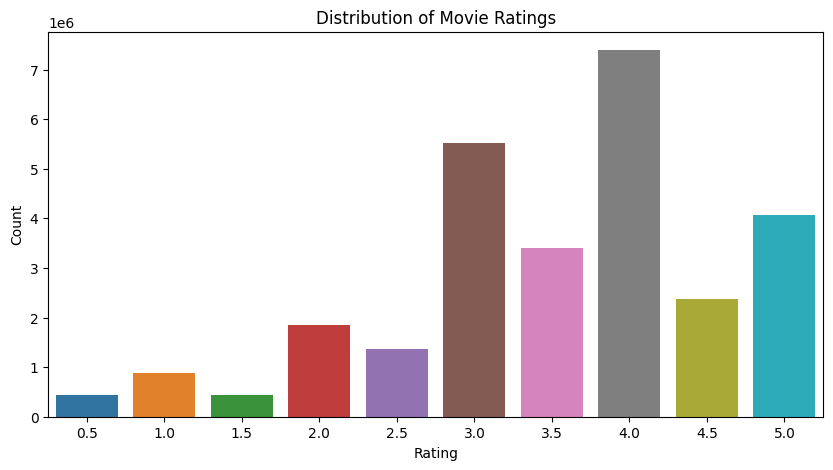

In [102]:
# distribution of movie ratings
plt.figure(figsize=(10, 5))
sns.countplot(data=ratings, x='rating')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

We notice that not too many movies (compared to the dataset as a whole), are rated less then 2.0

In [103]:
# filter for ratings<= 1.5
low_ratings = ratings[ratings['rating'] <= 1.5]

# count the number of low rated movies
num_low_ratings = len(low_ratings['movieId'].unique())

print(f'Number of low rated movies: {num_low_ratings} out of {len(movies)}')

Number of low rated movies: 30793 out of 58098


In [104]:
# filter the top 10 movies with the most ratings
top_10_movies = ratings['movieId'].value_counts().head(10)
top_10_movies

318     97999
356     97040
296     92406
593     87899
2571    84545
260     81815
480     76451
527     71516
110     68803
1       68469
Name: movieId, dtype: int64

In [123]:
# what is the title of tthe movieid 318
movies[movies['movieId'] == 110]


,movieId,title,genres
108,110,Braveheart (1995),Action|Drama|War


In [122]:
# what is braveheart's movieId
movies[movies['title'] == 'Braveheart (1995)']


,movieId,title,genres
108,110,Braveheart (1995),Action|Drama|War


In [105]:
ratings[ratings['movieId'].isin(top_10_movies.index)].groupby('movieId')['rating'].mean()

movieId
1       3.886649
110     4.008481
260     4.120455
296     4.173971
318     4.424188
356     4.056585
480     3.665034
527     4.257502
593     4.151412
2571    4.149695
Name: rating, dtype: float64

In [111]:
# Beräkna den genomsnittliga ratingen för dessa 10 filmerna med flest ratings
top_10_movies = ratings[ratings['movieId'].isin(top_10_movies.index)] # get the top 10 movies with the most ratings
top_10_movies_avg = top_10_movies.groupby('movieId')['rating'].mean() # get the average rating for each movie
top_10_movies_avg

movieId
43        3.466254
121       3.735772
129       3.171642
158       2.890464
185       3.118942
            ...   
193539    3.500000
193649    3.500000
193665    4.000000
193819    2.000000
193857    2.000000
Name: rating, Length: 1229, dtype: float64

In [124]:
#  Gör en plot över årtal och antalet filmer representerade i datasetet
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True) # extract the year from the title
movies['year'] = movies['year'].astype(int) # convert the year to an integer
movies['year'].hist(bins=50) # plot the histogram
plt.title('Number of Movies per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

ValueError: cannot convert float NaN to integer